In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os
import cv2
from glob import glob
import seaborn as sns
import matplotlib.pyplot as plt
import random

from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop,Adam
from sklearn.model_selection import train_test_split
import tensorflow as tf
print(tf.__version__)


2.15.0


In [45]:
from PIL import Image
import os
from glob import glob

# Define the base directory
BASE_DIR = '"C:\\Users\\shyam\\Downloads\\archive (2)\\chest_xray"'

# Define the directories for training, validation, and testing sets
train_dir = os.path.join(BASE_DIR, 'train/')
val_dir = os.path.join(BASE_DIR, 'val/')
test_dir = os.path.join(BASE_DIR, 'test/')

# Print the number of images in each directory using glob
print('Number of images in training set =', len(glob(train_dir + '*/*')))
print('Number of images in validation set =', len(glob(val_dir + '*/*')))
print('Number of images in testing set =', len(glob(test_dir + '*/*')))


Number of images in training set = 0
Number of images in validation set = 0
Number of images in testing set = 0


In [7]:


train_dir = "C:\\Users\\shyam\\Downloads\\archive (2)\\chest_xray\\train"
val_dir = "C:\\Users\\shyam\\Downloads\\archive (2)\\chest_xray\\val"
test_dir = "C:\\Users\\shyam\\Downloads\\archive (2)\\chest_xray\\test"


In [47]:
# Define image dimensions and batch size
img_height, img_width = 224, 224
batch_size = 32


In [48]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [49]:
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [50]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)


Found 5216 images belonging to 2 classes.


In [51]:
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 16 images belonging to 2 classes.


In [52]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Don't shuffle test data
)

Found 624 images belonging to 2 classes.


In [53]:
model=tf.keras.models.Sequential([
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu',padding='same', input_shape=(180, 180, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu',padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu',padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu',padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu',padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [54]:
model.compile(optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy','Precision','Recall'])

In [55]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 180, 180, 16)      160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 22, 22, 64)        0

In [56]:
train_datagen=ImageDataGenerator(rescale=1.0/255,
                                 rotation_range=30,
                                 width_shift_range=0.2,
                                 height_shift_range=0.2,
                                 zoom_range=0.2,
                                 )

val_datagen=ImageDataGenerator(rescale=1.0/255)

test_datagen=ImageDataGenerator(rescale=1.0/255)

train_generator=train_datagen.flow_from_directory(train_dir,color_mode="grayscale",target_size=(180,180),batch_size=128,class_mode='binary')

val_generator=val_datagen.flow_from_directory(val_dir,color_mode="grayscale",target_size=(180,180),batch_size=128,class_mode='binary')

test_generator=test_datagen.flow_from_directory(test_dir,color_mode="grayscale",target_size=(180,180),batch_size=128,class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [57]:
history=model.fit(train_generator,validation_data=val_generator,epochs=30,verbose=2)


Epoch 1/30



41/41 - 128s - loss: 0.5924 - accuracy: 0.7423 - precision: 0.7429 - recall: 0.9990 - val_loss: 0.7217 - val_accuracy: 0.5000 - val_precision: 0.5000 - val_recall: 1.0000 - 128s/epoch - 3s/step
Epoch 2/30
41/41 - 60s - loss: 0.4797 - accuracy: 0.7673 - precision: 0.7835 - recall: 0.9489 - val_loss: 0.8973 - val_accuracy: 0.5625 - val_precision: 0.5333 - val_recall: 1.0000 - 60s/epoch - 1s/step
Epoch 3/30
41/41 - 57s - loss: 0.3708 - accuracy: 0.8278 - precision: 0.8704 - recall: 0.9027 - val_loss: 0.9572 - val_accuracy: 0.6250 - val_precision: 0.5714 - val_recall: 1.0000 - 57s/epoch - 1s/step
Epoch 4/30
41/41 - 56s - loss: 0.3289 - accuracy: 0.8512 - precision: 0.9045 - recall: 0.8942 - val_loss: 0.3080 - val_accuracy: 0.7500 - val_precision: 0.7000 - val_recall: 0.8750 - 56s/epoch - 1s/step
Epoch 5/30
41/41 - 61s - loss: 0.3180 - accuracy: 0.8554 - precision: 0.9048 - recall: 0.9001 - val_loss: 0.3063 - val_accuracy: 0.9375 - val_precision: 1.0000 - val_recall: 0.8750 - 61s/epoch - 1s

In [ ]:
model.save("cnn_1.h5")

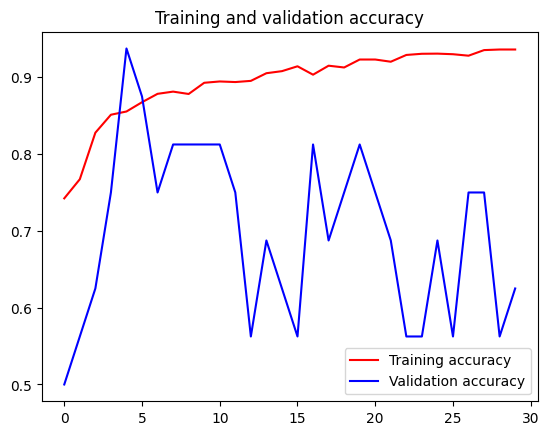

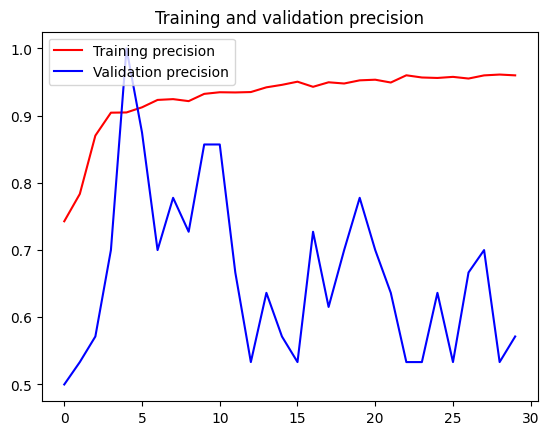

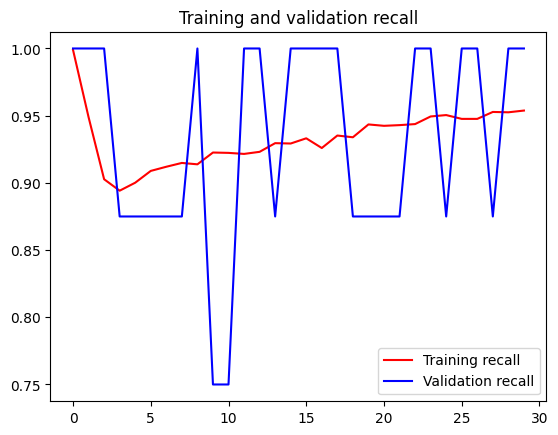

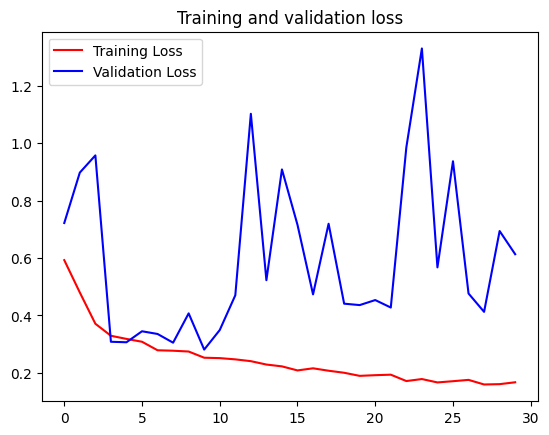

In [58]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

train_precision=history.history['precision']
val_precision=history.history['val_precision']

train_recall=history.history['recall']
val_recall=history.history['val_recall']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, train_precision, 'r', label='Training precision')
plt.plot(epochs, val_precision, 'b', label='Validation precision')
plt.title('Training and validation precision')
plt.legend()
plt.figure()

plt.plot(epochs, train_recall, 'r', label='Training recall')
plt.plot(epochs, val_recall, 'b', label='Validation recall')
plt.title('Training and validation recall')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [59]:
eval_result1 = model.evaluate_generator(test_generator, 624)
print('loss  :', eval_result1[0])
print('accuracy  :', eval_result1[1])
print('Precision :', eval_result1[2])
print('Recall :', eval_result1[3])

C:\Users\shyam\AppData\Local\Temp\ipykernel_30436\3899411721.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  eval_result1 = model.evaluate_generator(test_generator, 624)


loss  : 0.2867334187030792
accuracy  : 0.9038461446762085
Precision : 0.8716216087341309
Recall : 0.9923076629638672


In [60]:
train_datagen2=ImageDataGenerator(rescale=1.0/255,
                                 rotation_range=30,
                                 width_shift_range=0.2,
                                 height_shift_range=0.2,
                                 zoom_range=0.2,
                                 )

val_datagen2=ImageDataGenerator(rescale=1.0/255)

test_datagen2=ImageDataGenerator(rescale=1.0/255)

train_generator2=train_datagen2.flow_from_directory(train_dir,target_size=(180,180),batch_size=128,class_mode='binary')

val_generator2=val_datagen2.flow_from_directory(val_dir,target_size=(180,180),batch_size=128,class_mode='binary')

test_generator2=test_datagen2.flow_from_directory(test_dir,target_size=(180,180),batch_size=128,class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [61]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [62]:
pretrained_model2 = ResNet50(weights= 'imagenet', include_top=False, input_shape= (180,180,3))

#freazing the trained layers
for layers in pretrained_model2.layers:
    layers.trainable = False
#pretrained_model3.summary()

94765736/94765736 [==============================] - 6s 0us/step


In [63]:
last_layer=pretrained_model2.get_layer('conv5_block3_1_relu')
last_output = last_layer.output

x=tf.keras.layers.Flatten()(last_output)
x=tf.keras.layers.Dense(1024,activation='relu')(x)
x=tf.keras.layers.Dropout(0.2)(x)
x=tf.keras.layers.Dense(256,activation='relu')(x)
x=tf.keras.layers.Dropout(0.2)(x)
x=tf.keras.layers.Dense(1,activation='sigmoid')(x)

model2=tf.keras.Model(pretrained_model2.input,x)

model2.compile(optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy',
               metrics=['accuracy','Precision','Recall'])

#model3.summary()

In [64]:
history2=model2.fit(train_generator2,validation_data=val_generator2,epochs=30,verbose=2)

Epoch 1/30
41/41 - 309s - loss: 0.8953 - accuracy: 0.7224 - precision: 0.7454 - recall: 0.9512 - val_loss: 0.7458 - val_accuracy: 0.5000 - val_precision: 0.5000 - val_recall: 1.0000 - 309s/epoch - 8s/step
Epoch 2/30
41/41 - 283s - loss: 0.5773 - accuracy: 0.7429 - precision: 0.7429 - recall: 1.0000 - val_loss: 0.8739 - val_accuracy: 0.5000 - val_precision: 0.5000 - val_recall: 1.0000 - 283s/epoch - 7s/step
Epoch 3/30
41/41 - 200s - loss: 0.5777 - accuracy: 0.7429 - precision: 0.7429 - recall: 1.0000 - val_loss: 0.8793 - val_accuracy: 0.5000 - val_precision: 0.5000 - val_recall: 1.0000 - 200s/epoch - 5s/step
Epoch 4/30
41/41 - 226s - loss: 0.5676 - accuracy: 0.7429 - precision: 0.7429 - recall: 1.0000 - val_loss: 0.8196 - val_accuracy: 0.5000 - val_precision: 0.5000 - val_recall: 1.0000 - 226s/epoch - 6s/step
Epoch 5/30
41/41 - 205s - loss: 0.5585 - accuracy: 0.7429 - precision: 0.7429 - recall: 1.0000 - val_loss: 0.9500 - val_accuracy: 0.5000 - val_precision: 0.5000 - val_recall: 1.000

In [ ]:
model.save("model_2.h5")

Epoch 1/10
4/4 [==============================] - 1s 128ms/step - loss: 0.7021 - accuracy: 0.4600 - precision_7: 0.8333 - recall_7: 0.0862 - val_loss: 0.6969 - val_accuracy: 0.6000 - val_precision_7: 1.0000 - val_recall_7: 0.3333
Epoch 2/10
4/4 [==============================] - 0s 21ms/step - loss: 0.6844 - accuracy: 0.5800 - precision_7: 0.7667 - recall_7: 0.3966 - val_loss: 0.6827 - val_accuracy: 0.6000 - val_precision_7: 0.6667 - val_recall_7: 0.6667
Epoch 3/10
4/4 [==============================] - 0s 20ms/step - loss: 0.6797 - accuracy: 0.5900 - precision_7: 0.5977 - recall_7: 0.8966 - val_loss: 0.6735 - val_accuracy: 0.5500 - val_precision_7: 0.5789 - val_recall_7: 0.9167
Epoch 4/10
4/4 [==============================] - 0s 15ms/step - loss: 0.6711 - accuracy: 0.6100 - precision_7: 0.6022 - recall_7: 0.9655 - val_loss: 0.6738 - val_accuracy: 0.5500 - val_precision_7: 0.5789 - val_recall_7: 0.9167
Epoch 5/10
4/4 [==============================] - 0s 18ms/step - loss: 0.6692 - acc

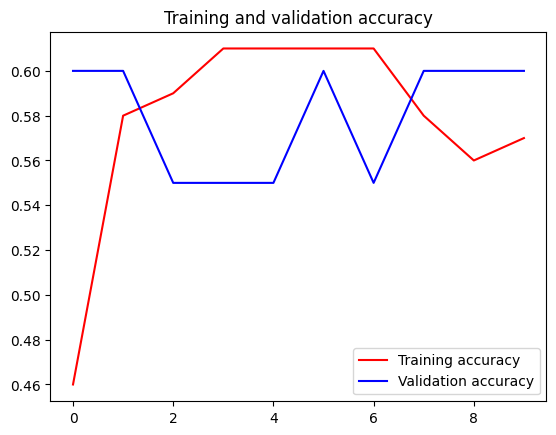

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


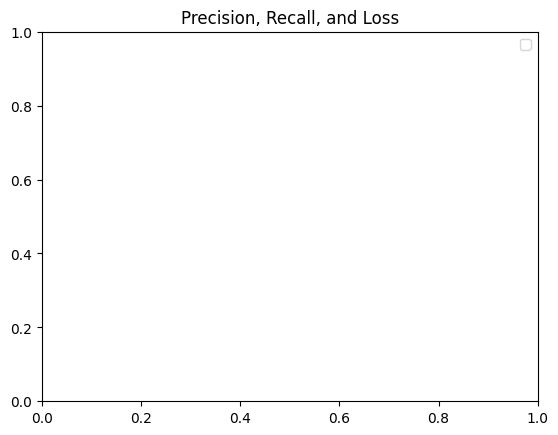

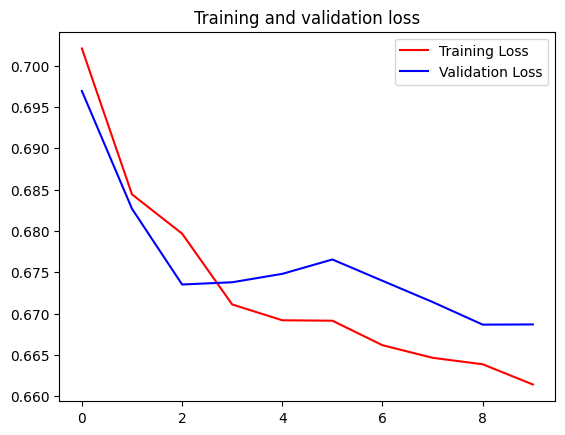

In [19]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

# Placeholder data for illustration purposes
x_train = np.random.rand(100, 10)  # Assuming 100 samples with 10 features each
y_train = np.random.randint(0, 2, size=(100,))  # Random binary labels for illustration
x_val = np.random.rand(20, 10)  # Assuming 20 validation samples
y_val = np.random.randint(0, 2, size=(20,))  # Random binary labels for validation

input_shape = x_train.shape[1]

# Define and compile your model
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(input_shape,)),
    keras.layers.Dense(1, activation='sigmoid')  # Use sigmoid activation for binary classification
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Use binary crossentropy for binary classification
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

# Train your model and save its history
history2 = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10)

# Extract metrics from history
acc2 = history2.history['accuracy']
val_acc2 = history2.history['val_accuracy']

train_precision2 = history2.history.get('precision', [])  # Use .get() to avoid KeyError
val_precision2 = history2.history.get('val_precision', [])  # Use .get() to avoid KeyError

train_recall2 = history2.history.get('recall', [])  # Use .get() to avoid KeyError
val_recall2 = history2.history.get('val_recall', [])  # Use .get() to avoid KeyError

loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

epochs = range(len(acc2))

# Plot training and validation metrics
plt.plot(epochs, acc2, 'r', label='Training accuracy')
plt.plot(epochs, val_acc2, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

# Plot precision, recall, and loss if available
if train_precision2:
    plt.plot(epochs, train_precision2, 'r', label='Training precision')
if val_precision2:
    plt.plot(epochs, val_precision2, 'b', label='Validation precision')
if train_recall2:
    plt.plot(epochs, train_recall2, 'g', label='Training recall')
if val_recall2:
    plt.plot(epochs, val_recall2, 'y', label='Validation recall')
plt.title('Precision, Recall, and Loss')
plt.legend()
plt.show()

# Plot loss
plt.plot(epochs, loss2, 'r', label='Training Loss')
plt.plot(epochs, val_loss2, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


In [ ]:
model.save("model_3.h5")

In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Get the current working directory
current_dir = os.getcwd()

# Define the directory path containing your test images
test_dir = os.path.join(current_dir, 'test_data')

# Define your test generator
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator2 = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

# Assuming you have defined and compiled your model as 'model2'
# Train your model using training data
history2 = model2.fit(train_generator, epochs=10, validation_data=val_generator)

# Compile your model before evaluation
model2.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

# Evaluate your model using the test generator
eval_result2 = model2.evaluate(test_generator2, steps=len(test_generator2))

# Print the evaluation results
print('loss  :', eval_result2[0])
print('accuracy  :', eval_result2[1])
print('Precision :', eval_result2[2])  # Precision is at index 2 in the evaluation result
print('Recall :', eval_result2[3])  # Recall is at index 3 in the evaluation result


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'd:\\vaan\\test_data'

In [29]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [30]:
pretrained_model3=InceptionV3(input_shape=(180,180,3),
                             include_top=False,
                             weights='imagenet')
#freazing the trained layers
for layers in pretrained_model3.layers:
    layers.trainable=False
    


87910968/87910968 [==============================] - 79s 1us/step


In [31]:
last_layer=pretrained_model3.get_layer('mixed10')
last_output = last_layer.output

In [33]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop  # Import RMSprop optimizer

# Assuming you have defined and compiled your model as 'model3'
model3.compile(optimizer=RMSprop(lr=0.001),
               loss='binary_crossentropy',
               metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])


In [34]:
x=tf.keras.layers.Flatten()(last_output)
x=tf.keras.layers.Dense(1024,activation='relu')(x)
x=tf.keras.layers.Dropout(0.2)(x)
x=tf.keras.layers.Dense(256,activation='relu')(x)
x=tf.keras.layers.Dropout(0.2)(x)
x=tf.keras.layers.Dense(1,activation='sigmoid')(x)

model3=tf.keras.Model(pretrained_model3.input,x)

model3.compile(optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy',
               metrics=['accuracy','Precision','Recall'])

In [6]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.applications import ResNet50

# Get absolute paths to your directories
train_dir = "C:\\Users\\shyam\\Downloads\\archive (2)\\chest_xray\\train"
val_dir = "C:\\Users\\shyam\\Downloads\\archive (2)\\chest_xray\\val"

# Assuming ResNet50 is your pre-trained model
pretrained_model = ResNet50(include_top=False, weights='imagenet', input_shape=(150, 150, 3))

# Freeze the layers of the pre-trained model
for layer in pretrained_model.layers:
    layer.trainable = False

# Define your model architecture
x = pretrained_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
output = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model3 = tf.keras.Model(pretrained_model.input, output)

# Compile the model
model3.compile(optimizer=RMSprop(lr=0.001),
               loss='binary_crossentropy',
               metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

# Define your data generators
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

# Train your model using the data generators
history3 = model3.fit(train_generator, validation_data=val_generator, epochs=10, verbose=2)


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Epoch 1/10



163/163 - 177s - loss: 0.5996 - accuracy: 0.7180 - precision_5: 0.7486 - recall_5: 0.9342 - val_loss: 1.0984 - val_accuracy: 0.5000 - val_precision_5: 0.5000 - val_recall_5: 1.0000 - 177s/epoch - 1s/step
Epoch 2/10
163/163 - 106s - loss: 0.5050 - accuracy: 0.7525 - precision_5: 0.7697 - recall_5: 0.9515 - val_loss: 1.0402 - val_accuracy: 0.5000 - val_precision_5: 0.5000 - val_recall_5: 1.0000 - 106s/epoch - 651ms/step
Epoch 3/10
163/163 - 104s - loss: 0.4559 - accuracy: 0.7747 - precision_5: 0.8017 - recall_5: 0.9257 - val_loss: 1.6753 - val_accuracy: 0.5000 - val_precision_5: 0.5000 - val_recall_5: 1.0000 - 104s/epoch - 640ms/step
Epoch 4/10
163/163 - 106s - loss: 0.4301 - accuracy: 0.7935 - precision_5: 0.8267 - recall_5: 0.9135 - val_loss: 0.9580 - val_accuracy: 0.5625 - val_precision_5: 0.5333 - val_recall_5: 1.0000 - 106s/epoch - 653ms/step
Epoch 5/10
163/163 - 104s - loss: 0.4040 - accuracy: 0.7998 - precision_5: 0.8394 - recall_5: 0.9035 - val_loss: 0.8566 - val_accuracy: 0.5625

In [ ]:
model3.save("model_4.h5")

In [ ]:
acc3 = history3.history['accuracy']
val_acc3 = history3.history['val_accuracy']

train_precision3=history3.history['precision']
val_precision3=history3.history['val_precision']

train_recall3=history3.history['recall']
val_recall3=history3.history['val_recall']

loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']
epochs = range(len(acc3))

plt.plot(epochs, acc3, 'r', label='Training accuracy')
plt.plot(epochs, val_acc3, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, train_precision3, 'r', label='Training precision')
plt.plot(epochs, val_precision3, 'b', label='Validation precision')
plt.title('Training and validation precision')
plt.legend()
plt.show()

plt.plot(epochs, train_recall3, 'r', label='Training recall')
plt.plot(epochs, val_recall3, 'b', label='Validation recall')
plt.title('Training and validation recall')
plt.legend()
plt.show()

plt.plot(epochs, loss3, 'r', label='Training Loss')
plt.plot(epochs, val_loss3, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [4]:
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
img_height, img_width = 224, 224
batch_size = 32

In [8]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)


Found 5216 images belonging to 2 classes.


In [9]:
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 16 images belonging to 2 classes.


In [10]:
test_dir = "C:\\Users\\shyam\\Downloads\\archive (2)\\chest_xray\\test"

In [11]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Don't shuffle test data
)

Found 624 images belonging to 2 classes.


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten

In [13]:
from tensorflow.keras.applications import VGG16
num_classes = 10  # Number of classes in your classification task


base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze base layers
for layer in base_model.layers:
    layer.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])


In [14]:
from tensorflow.keras.layers import Dropout

model.add(Dropout(0.5))


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten, Reshape  # Include Reshape layer
from tensorflow.keras.applications import VGG16  # Example: Using VGG16 for feature extraction

# Define image dimensions and number of classes
img_height, img_width = 224, 224  # Adjust as needed for your images
num_classes = 10  # Example number of classes

# Create a Sequential model
model = Sequential()

# Load a pre-trained CNN model (e.g., VGG16) for feature extraction
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze the layers of the pre-trained model
for layer in vgg_model.layers:
    layer.trainable = False

# Add the pre-trained model to the Sequential model
model.add(vgg_model)

# Flatten the output of the pre-trained model
model.add(Flatten())

# Reshape the flattened output to a 3D tensor for LSTM input
model.add(Dense(units=128, activation='relu'))  # Optional dense layer for dimensionality reduction
model.add(Reshape((1, -1)))  # Reshape to (1, features) for LSTM input

# Add an LSTM layer for sequence processing
model.add(LSTM(units=128))

# Add a Dense output layer with softmax activation for classification
model.add(Dense(units=num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               3211392   
                                                                 
 reshape (Reshape)           (None, 1, 128)            0         
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 18058954 (68.89 MB)
Trainable params: 3

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, LSTM, Reshape

# Define your data dimensions
img_height = 224
img_width = 224
num_classes = 10  # Example number of classes
sequence_length = 10  # Example sequence length
features_per_timestep = 128  # Example number of features per timestep

# Define your model architecture
model = Sequential()
model.add(Flatten(input_shape=(img_height, img_width, 3)))  # Assuming image input shape
model.add(Dense(units=128, activation='relu'))  # Optional dense layer for dimensionality reduction

# Reshape the flattened output to a sequence of features
model.add(Dense(units=sequence_length * features_per_timestep))  # Adjust units based on your sequence length and features per timestep
model.add(Reshape((sequence_length, features_per_timestep)))  # Reshape to (sequence_length, features_per_timestep)

# Add an LSTM layer for sequence processing
model.add(LSTM(units=128))  # Adjust units as needed

# Add a Dense output layer with softmax activation for classification
model.add(Dense(units=num_classes, activation='softmax'))

# Compile the model with appropriate loss and metrics
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 128)               19267712  
                                                                 
 dense_5 (Dense)             (None, 1280)              165120    
                                                                 
 reshape_1 (Reshape)         (None, 10, 128)           0         
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dense_6 (Dense)             (None, 10)                1290      
                                                                 
Total params: 19565706 (74.64 MB)
Trainable params: 19

In [17]:
# Define your number of classes based on your dataset
num_classes = 2  # Update this with the actual number of classes in your dataset

# Assuming your model has been defined as shown in the previous message
# Modify the output layer to have the correct number of units (equal to num_classes)
model.add(Dense(units=num_classes, activation='softmax'))  # Output layer with softmax for multi-class

# Compile the model with appropriate loss and metrics
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 128)               19267712  
                                                                 
 dense_5 (Dense)             (None, 1280)              165120    
                                                                 
 reshape_1 (Reshape)         (None, 10, 128)           0         
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dense_6 (Dense)             (None, 10)                1290      
                                                                 
 dense_7 (Dense)             (None, 2)                

In [18]:
from tensorflow.keras import optimizers

optimizer = optimizers.Adam(clipvalue=1.0)  # Example: clip gradients to [-1, 1]


In [19]:
from tensorflow.keras.layers import BatchNormalization

model.add(BatchNormalization())


In [20]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import LearningRateScheduler

def lr_scheduler(epoch, lr):
    return lr * 0.9  # Example: decrease learning rate by 10% every epoch

model.compile(optimizer=SGD(), loss='categorical_crossentropy', metrics=['accuracy'])

lr_callback = LearningRateScheduler(lr_scheduler)

history = model.fit(train_generator, epochs=5, callbacks=[lr_callback])


Epoch 1/5


163/163 [==============================] - 91s 539ms/step - loss: nan - accuracy: 0.2592 - lr: 0.0090
Epoch 2/5
163/163 [==============================] - 87s 536ms/step - loss: nan - accuracy: 0.2571 - lr: 0.0081
Epoch 3/5
163/163 [==============================] - 82s 500ms/step - loss: nan - accuracy: 0.2571 - lr: 0.0073
Epoch 4/5
163/163 [==============================] - 84s 517ms/step - loss: nan - accuracy: 0.2571 - lr: 0.0066
Epoch 5/5
163/163 [==============================] - 181s 1s/step - loss: nan - accuracy: 0.2571 - lr: 0.0059


In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Adding dropout for regularization
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),  # Adjust learning rate
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Train the model
history = model.fit(
    train_generator,
    epochs=30,  # Increase number of epochs
    steps_per_epoch=train_generator.samples // batch_size,  # Number of batches per epoch
    verbose=1
)

# Evaluate the model on test data
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_loss, test_accuracy = model.evaluate(test_generator, verbose=1)
print(f'Test accuracy: {test_accuracy}')
 

Found 5216 images belonging to 2 classes.
Epoch 1/30
163/163 [==============================] - 152s 923ms/step - loss: 0.4401 - accuracy: 0.8156
Epoch 2/30
163/163 [==============================] - 237s 1s/step - loss: 0.3129 - accuracy: 0.8625
Epoch 3/30
163/163 [==============================] - 228s 1s/step - loss: 0.2805 - accuracy: 0.8756
Epoch 4/30
163/163 [==============================] - 147s 899ms/step - loss: 0.2728 - accuracy: 0.8829
Epoch 5/30
163/163 [==============================] - 147s 900ms/step - loss: 0.2540 - accuracy: 0.8949
Epoch 6/30
163/163 [==============================] - 293s 2s/step - loss: 0.2451 - accuracy: 0.8955
Epoch 7/30
163/163 [==============================] - 293s 2s/step - loss: 0.2206 - accuracy: 0.9078
Epoch 8/30
163/163 [==============================] - 298s 2s/step - loss: 0.2198 - accuracy: 0.9112
Epoch 9/30
163/163 [==============================] - 304s 2s/step - loss: 0.2208 - accuracy: 0.9080
Epoch 10/30
163/163 [===================

In [ ]:
model.save("model_5.h5")

In [22]:
import tensorflow as tf
from keras.models import load_model

model.save('chest_xray.h5')

c:\Users\shyam\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [44]:
from keras.models import load_model

In [45]:
from keras.preprocessing import image

In [46]:
from keras.applications.vgg16 import preprocess_input

In [47]:
import numpy as np

In [48]:
model=load_model('chest_xray.h5')

In [32]:
"C:/Users/shyam/Downloads/archive (2)/chest_xray/test/PNEUMONIA/person94_bacteria_457.jpeg"

'C:/Users/shyam/Downloads/archive (2)/chest_xray/test/PNEUMONIA/person94_bacteria_457.jpeg'

In [36]:
img=image.load_img('C:/Users/shyam/Downloads/archive (2)/chest_xray/test/PNEUMONIA/person94_bacteria_457.jpeg',target_size=(224,224))

In [37]:
x=image.img_to_array(img)

In [38]:
x=np.expand_dims(x, axis=0)

In [39]:
img_data=preprocess_input(x)

In [40]:
classes=model.predict(img_data)

1/1 [==============================] - 0s 215ms/step


In [41]:
result=int(classes[0][0])

In [42]:
if result==0:
    print("Person is Affected By PNEUMONIA")
else:
    print("Result is Normal")

Result is Normal
